In [1]:
import pandas as pd
from uncertainties import ufloat, unumpy
from uncertainties.umath import log10
import numpy as np

# Asegurarse de que tienes las columnas en tu DataFrame
# df['H_ALPHA_FLUX'], df['H_ALPHA_FLUX_ERR'], df['OIII_5007_FLUX'], df['OIII_5007_FLUX_ERR'],
# df['H_BETA_FLUX'], df['H_BETA_FLUX_ERR'], df['NII_6584_FLUX'], df['NII_6584_FLUX_ERR']

df = pd.read_csv('measurement_emission_lines_oficial.tsv', delimiter='\t')
df = df.drop(index=[19,20,21,22,23])

# Crear columnas con ufloat
df['H_ALPHA_FLUX_UN'] = df.apply(lambda row: ufloat(row['H_ALPHA_FLUX'], row['H_ALPHA_FLUX_ERR']), axis=1)
df['OIII_5007_FLUX_UN'] = df.apply(lambda row: ufloat(row['OIII_5007_FLUX'], row['OIII_5007_FLUX_ERR']), axis=1)
df['H_BETA_FLUX_UN'] = df.apply(lambda row: ufloat(row['H_BETA_FLUX'], row['H_BETA_FLUX_ERR']), axis=1)
df['NII_6584_FLUX_UN'] = df.apply(lambda row: ufloat(row['NII_6584_FLUX'], row['NII_6584_FLUX_ERR']), axis=1)

# Calcular las razones con incertidumbres
o3_hb_un = df['OIII_5007_FLUX_UN'] / df['H_BETA_FLUX_UN']
nii_ha_un = df['NII_6584_FLUX_UN'] / df['H_ALPHA_FLUX_UN']

# Calcular O3N2 = log10((OIII 5007 / Hbeta) / (NII 6584 / Halpha))
o3n2_un = unumpy.log10(o3_hb_un / nii_ha_un)

# Definir constantes con incertidumbres
const_o3n2 = ufloat(8.533, 0.012)
coef_o3n2 = ufloat(0.214, 0.012)

# Calcular 12 + log(O/H) usando O3N2
abund_o3n2_un = const_o3n2 - coef_o3n2 * o3n2_un

# Calcular N2 = log10(NII 6584 / Halpha)
n2_un = unumpy.log10(nii_ha_un)

# Definir constantes con incertidumbres
const_n2 = ufloat(8.743, 0.027)
coef_n2 = ufloat(0.462, 0.024)

# Calcular 12 + log(O/H) usando N2
abund_n2_un = const_n2 + coef_n2 * n2_un

# Añadir las columnas calculadas al DataFrame
df['O3N2'] = unumpy.nominal_values(o3n2_un)
df['O3N2_ERR'] = unumpy.std_devs(o3n2_un)
df['12_LOG_OH_O3N2'] = unumpy.nominal_values(abund_o3n2_un)
df['12_LOG_OH_O3N2_ERR'] = unumpy.std_devs(abund_o3n2_un)

df['N2'] = unumpy.nominal_values(n2_un)
df['N2_ERR'] = unumpy.std_devs(n2_un)
df['12_LOG_OH_N2'] = unumpy.nominal_values(abund_n2_un)
df['12_LOG_OH_N2_ERR'] = unumpy.std_devs(abund_n2_un)

# Mostrar el DataFrame con las nuevas columnas
print(df[['O3N2', 'O3N2_ERR', '12_LOG_OH_O3N2', '12_LOG_OH_O3N2_ERR', 'N2', 'N2_ERR', '12_LOG_OH_N2', '12_LOG_OH_N2_ERR']])


        O3N2  O3N2_ERR  12_LOG_OH_O3N2  12_LOG_OH_O3N2_ERR        N2  \
0   2.302457  0.116733        8.040274            0.039133 -1.555764   
1   2.149918  0.122252        8.072918            0.038653 -1.451178   
2   1.661652  0.062130        8.177406            0.026803 -1.186067   
3   2.043276  0.230631        8.095739            0.056401 -1.403431   
4   1.696670  0.179831        8.169913            0.045161 -1.271665   
5   2.046083  0.161162        8.095138            0.044004 -1.378000   
6   1.633500  0.073870        8.183431            0.027895 -1.203707   
7   2.109697  0.078903        8.081525            0.032711 -1.469431   
8   1.829329  0.120134        8.141524            0.035872 -1.593629   
9   1.745124  0.079906        8.159543            0.029580 -1.276753   
10  1.599958  0.087035        8.190609            0.029318 -1.197927   
11  1.867439  0.120714        8.133368            0.036242 -1.374611   
12  1.467970  0.078453        8.218854            0.027133 -1.20

In [2]:
import pandas as pd
from uncertainties import ufloat, unumpy
from uncertainties.umath import log10

df = pd.read_csv('measurement_emission_lines_oficial.tsv', delimiter='\t')
df = df.drop(index=[19,20,21,22,23])

# Crear columnas con ufloat en tu DataFrame
df['H_ALPHA_FLUX_UN'] = df.apply(lambda row: ufloat(row['H_ALPHA_FLUX'], row['H_ALPHA_FLUX_ERR']), axis=1)
df['OIII_5007_FLUX_UN'] = df.apply(lambda row: ufloat(row['OIII_5007_FLUX'], row['OIII_5007_FLUX_ERR']), axis=1)
df['H_BETA_FLUX_UN'] = df.apply(lambda row: ufloat(row['H_BETA_FLUX'], row['H_BETA_FLUX_ERR']), axis=1)
df['NII_6584_FLUX_UN'] = df.apply(lambda row: ufloat(row['NII_6584_FLUX'], row['NII_6584_FLUX_ERR']), axis=1)

# Calcular las razones con incertidumbres
df['OIII_HB_UN'] = df.apply(lambda row: row['OIII_5007_FLUX_UN'] / row['H_BETA_FLUX_UN'], axis=1)
df['NII_HA_UN'] = df.apply(lambda row: row['NII_6584_FLUX_UN'] / row['H_ALPHA_FLUX_UN'], axis=1)

# Calcular O3N2 = log10((OIII 5007 / Hbeta) / (NII 6584 / Halpha))
df['O3N2_UN'] = df.apply(lambda row: log10(row['OIII_HB_UN'] / row['NII_HA_UN']), axis=1)

# Definir constantes con incertidumbres para O3N2
const_o3n2 = ufloat(8.533, 0.012)
coef_o3n2 = ufloat(0.214, 0.012)

# Calcular 12 + log(O/H) usando O3N2
df['12_LOG_OH_O3N2_UN'] = df.apply(lambda row: const_o3n2 - coef_o3n2 * row['O3N2_UN'], axis=1)

# Calcular N2 = log10(NII 6584 / Halpha)
df['N2_UN'] = df['NII_HA_UN'].apply(log10)

# Definir constantes con incertidumbres para N2
const_n2 = ufloat(8.743, 0.027)
coef_n2 = ufloat(0.462, 0.024)

# Calcular 12 + log(O/H) usando N2
df['12_LOG_OH_N2_UN'] = df.apply(lambda row: const_n2 + coef_n2 * row['N2_UN'], axis=1)

# Añadir las columnas calculadas al DataFrame
df['O3N2'] = df['O3N2_UN'].apply(unumpy.nominal_values)
df['O3N2_ERR'] = df['O3N2_UN'].apply(unumpy.std_devs)
df['12_LOG_OH_O3N2'] = df['12_LOG_OH_O3N2_UN'].apply(unumpy.nominal_values)
df['12_LOG_OH_O3N2_ERR'] = df['12_LOG_OH_O3N2_UN'].apply(unumpy.std_devs)

df['N2'] = df['N2_UN'].apply(unumpy.nominal_values)
df['N2_ERR'] = df['N2_UN'].apply(unumpy.std_devs)
df['12_LOG_OH_N2'] = df['12_LOG_OH_N2_UN'].apply(unumpy.nominal_values)
df['12_LOG_OH_N2_ERR'] = df['12_LOG_OH_N2_UN'].apply(unumpy.std_devs)

# Mostrar el DataFrame con las nuevas columnas
print(df[['ID','O3N2', 'O3N2_ERR', '12_LOG_OH_O3N2', '12_LOG_OH_O3N2_ERR', 'N2', 'N2_ERR', '12_LOG_OH_N2', '12_LOG_OH_N2_ERR']])


      ID      O3N2  O3N2_ERR  12_LOG_OH_O3N2  12_LOG_OH_O3N2_ERR        N2  \
0      1  2.302457  0.116733        8.040274            0.039133 -1.555764   
1      3  2.149918  0.122252        8.072918            0.038653 -1.451178   
2      7  1.661652  0.062130        8.177406            0.026803 -1.186067   
3      9  2.043276  0.230631        8.095739            0.056401 -1.403431   
4     11  1.696670  0.179831        8.169913            0.045161 -1.271665   
5     13  2.046083  0.161162        8.095138            0.044004 -1.378000   
6     17  1.633500  0.073870        8.183431            0.027895 -1.203707   
7     19  2.109697  0.078903        8.081525            0.032711 -1.469431   
8   21_1  1.829329  0.120134        8.141524            0.035872 -1.593629   
9   23_1  1.745124  0.079906        8.159543            0.029580 -1.276753   
10     4  1.599958  0.087035        8.190609            0.029318 -1.197927   
11     8  1.867439  0.120714        8.133368            0.036242

In [3]:
import numpy as np
from uncertainties import unumpy

# --- vector de ufloats de tus 19 regiones ---
vals = df['12_LOG_OH_N2_UN'].values  # array de ufloat

N = len(vals)  # debería ser 19

# 1) Promedio (propaga incertidumbres automáticamente)
mean_un = sum(vals) / N

# Extraer valor nominal y error del promedio
mean_nom = unumpy.nominal_values(mean_un)
mean_err = unumpy.std_devs(mean_un)

# 2) Mediana (se calcula sobre los valores nominales)
med_nom = np.median(unumpy.nominal_values(vals))

# 3) Desviación estándar de la muestra (sobre valores nominales)
std_nom = np.std(unumpy.nominal_values(vals), ddof=1)

# Mostrar resultados
print(f"Promedio 12+log(O/H)ₙ₂ = {mean_nom:.3f} ± {mean_err:.3f}")
print(f"Mediana  12+log(O/H)ₙ₂ = {med_nom:.3f}")
print(f"σ (muestra)           = {std_nom:.3f}")


Promedio 12+log(O/H)ₙ₂ = 8.133 ± 0.044
Mediana  12+log(O/H)ₙ₂ = 8.153
σ (muestra)           = 0.062


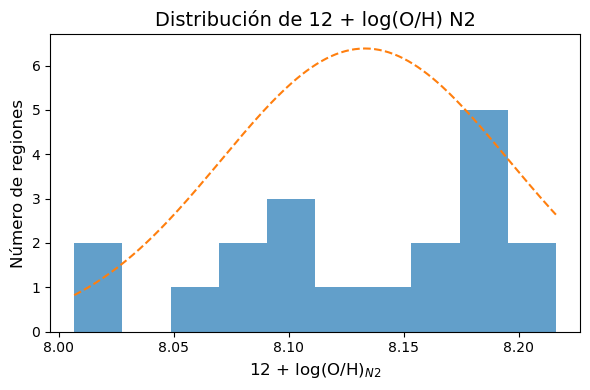

In [6]:
# Histograma en counts en lugar de densidad
plt.figure(figsize=(6,4))
plt.hist(vals_nom, bins=10, alpha=0.7)           # sin density=True

# Curva gaussiana (opcional, la dejamos para referencia)
x = np.linspace(vals_nom.min(), vals_nom.max(), 200)
gauss = (1 / (std_nom * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x - mean_nom) / std_nom)**2)
plt.plot(x, gauss, linestyle='--')

# Etiquetas ajustadas
plt.xlabel('12 + log(O/H)$_{N2}$', fontsize=12)
plt.ylabel('Número de regiones', fontsize=12)     # etiqueta de counts
plt.title('Distribución de 12 + log(O/H) N2', fontsize=14)
plt.tight_layout()
plt.show()


In [7]:
import pandas as pd

rounded = np.round(vals_nom, 3)
serie   = pd.Series(rounded)
moda = serie.mode().iloc[0]
cuenta_moda = (serie == moda).sum()

print(f"Moda (3 dec.) = {moda:.3f}, se repite en {cuenta_moda} regiones")

Moda (3 dec.) = 8.174, se repite en 2 regiones


In [8]:
import numpy as np

# 1) Definir número de bins igual al que usaste en el histograma
counts, edges = np.histogram(vals_nom, bins=10)

# 2) Encontrar el bin con más puntos
idx_max = np.argmax(counts)
bin_low, bin_high = edges[idx_max], edges[idx_max+1]
moda_approx = (bin_low + bin_high)/2
frecuencia  = counts[idx_max]

print(f"Moda (aprox.) = {moda_approx:.3f}, con {frecuencia} regiones en ese rango")


Moda (aprox.) = 8.185, con 5 regiones en ese rango


In [9]:
import numpy as np
import pandas as pd
from uncertainties import ufloat, unumpy
from scipy.stats import mode

# --- Vector de ufloats de tus 19 regiones ---
vals = df['12_LOG_OH_N2_UN'].values  # array de ufloat
N_regions = len(vals)                # debe ser 19

# Número de simulaciones Monte Carlo
N_sims = 5000

# Prealocar arrays
med_sims  = np.empty(N_sims)
mode_sims = np.empty(N_sims)

# Extraer arrays de medias y sigmas
means = unumpy.nominal_values(vals)
stds  = unumpy.std_devs(vals)

# Simulaciones
for i in range(N_sims):
    # muestreo: para cada región, un valor ~ Normal(mean, sigma)
    sample = np.random.normal(loc=means, scale=stds)
    
    # 1) Mediana de la sample
    med_sims[i] = np.median(sample)
    
    # 2) Moda aproximada: redondear a 3 decimales y usar scipy.mode
    rounded = np.round(sample, 3)
    mode_sims[i], _ = mode(rounded, keepdims=False)

# 1) Promedio (ya lo tenías)
mean_un  = sum(vals) / N_regions
mean_nom = unumpy.nominal_values(mean_un)
mean_err = unumpy.std_devs(mean_un)

# 2) Mediana con incertidumbre
med_nom = np.mean(med_sims)
med_err = np.std(med_sims, ddof=1)

# 3) Moda con incertidumbre
mode_nom = np.mean(mode_sims)
mode_err = np.std(mode_sims, ddof=1)

# 4) Desviación estándar de la muestra (sobre valores nominales)
std_nom = np.std(means, ddof=1)

# Mostrar resultados
print(f"Promedio 12+log(O/H)ₙ₂ = {mean_nom:.3f} ± {mean_err:.3f}")
print(f"Mediana  12+log(O/H)ₙ₂ = {med_nom:.3f} ± {med_err:.3f}")
print(f"Moda     12+log(O/H)ₙ₂ = {mode_nom:.3f} ± {mode_err:.3f}")
print(f"σ (muestra)           = {std_nom:.3f}")


Promedio 12+log(O/H)ₙ₂ = 8.133 ± 0.044
Mediana  12+log(O/H)ₙ₂ = 8.143 ± 0.022
Moda     12+log(O/H)ₙ₂ = 8.019 ± 0.113
σ (muestra)           = 0.062


In [10]:
import numpy as np
from uncertainties import unumpy

# Array de ufloats de tus 19 regiones:
vals = df['12_LOG_OH_N2_UN'].values

# Extraer medias y sigmas
medias = unumpy.nominal_values(vals)
sigmas = unumpy.std_devs(vals)

# Número de iteraciones
N_sims = 5000
medianas = np.empty(N_sims)

for i in range(N_sims):
    # Para cada región, muestrea un valor Normal(media, sigma)
    muestra = np.random.normal(loc=medias, scale=sigmas)
    # Guarda la mediana de esta simulación
    medianas[i] = np.median(muestra)

# Resultado: media y desviación de las medianas simuladas
mediana_nom  = medianas.mean()
mediana_err  = medianas.std(ddof=1)

print(f"Mediana 12+log(O/H)ₙ₂ = {mediana_nom:.3f} ± {mediana_err:.3f}")


Mediana 12+log(O/H)ₙ₂ = 8.143 ± 0.022


In [3]:
import pandas as pd
from uncertainties import ufloat, unumpy

# Supongamos que ya tienes un DataFrame llamado df con las siguientes columnas:
# 'SII_6716_FLUX', 'SII_6716_FLUX_ERR', 'SII_6731_FLUX', 'SII_6731_FLUX_ERR'

df = pd.read_csv('measurement_emission_lines_oficial.tsv', delimiter='\t')
df = df.drop(index=[19,20,21,22,23])

# Crear columnas de ufloat para los flujos
df['SII_6716_FLUX_UN'] = df.apply(lambda row: ufloat(row['SII_6716_FLUX'], row['SII_6716_FLUX_ERR']), axis=1)
df['SII_6731_FLUX_UN'] = df.apply(lambda row: ufloat(row['SII_6731_FLUX'], row['SII_6731_FLUX_ERR']), axis=1)

# Calcular la razón de [S II] 6716 / 6731 con incertidumbres
df['RSII'] = df['SII_6716_FLUX_UN'] / df['SII_6731_FLUX_UN']

# Añadir los resultados al DataFrame
df['RS2'] = unumpy.nominal_values(df['RSII'])
df['RS2_ERR'] = unumpy.std_devs(df['RSII'])

print(df[['RS2','RS2_ERR']])


         RS2   RS2_ERR
0   1.300533  0.030140
1   1.344631  0.028034
2   1.571378  0.096099
3   1.307733  0.025224
4   1.314517  0.023630
5   1.315696  0.026967
6   1.418905  0.044954
7   1.417386  0.032506
8   1.275557  0.052232
9   1.685949  0.124514
10  1.408171  0.035869
11  1.415241  0.046305
12  1.563727  0.067126
13  1.483259  0.077209
14  1.457765  0.037285
15  1.356119  0.069059
16  1.366554  0.071099
17  1.440295  0.145002
18  1.308351  0.139532


In [4]:
import pandas as pd
from uncertainties import ufloat, unumpy
import pyneb as pn

# Crear una instancia del objeto Atom para el azufre ionizado
sii = pn.Atom('S', 2)

# Supongamos una temperatura electrónica de 10,000 K
Te = 10000

# Crear columnas de ufloat para RS2 y RS2_ERR
df['RS2_UN'] = df.apply(lambda row: ufloat(row['RS2'], row['RS2_ERR']), axis=1)

# Crear listas para almacenar los valores de densidad electrónica y sus incertidumbres
ne_list = []
ne_err_list = []

for rs2_un in df['RS2_UN']:
    # Obtener el valor nominal y la incertidumbre de RS2
    rs2_nominal = rs2_un.nominal_value
    rs2_err = rs2_un.std_dev

    # Calcular la densidad electrónica y su incertidumbre
    ne = sii.getTemDen(int_ratio=rs2_nominal, tem=Te, wave1=6716, wave2=6731)
    ne_upper = sii.getTemDen(int_ratio=rs2_nominal + rs2_err, tem=Te, wave1=6716, wave2=6731)
    ne_lower = sii.getTemDen(int_ratio=rs2_nominal - rs2_err, tem=Te, wave1=6716, wave2=6731)
    ne_err = (ne_upper - ne_lower) / 2

    # Añadir los valores a las listas
    ne_list.append(ne)
    ne_err_list.append(ne_err)

# Añadir los resultados al DataFrame
df['NE'] = ne_list
df['NE_ERR'] = ne_err_list

print(df)


      ID   ID_MASK  H_BETA_FLUX  H_BETA_FLUX_ERR  OIII_5007_FLUX  \
0      1         1    76.522434         2.164415      427.052860   
1      3         3    14.925251         0.593611       74.586733   
2      7        11    11.544092         0.493640       34.509992   
3      9        13    27.353364         0.721480      119.359163   
4     11        15    41.371324         1.183268      110.078999   
5     13       NaN    26.796062         0.970286      124.782756   
6     17        21     9.753157         0.311534       26.238418   
7     19        23     6.794377         0.350104       29.676713   
8   21_1        25     8.345415         0.284692       14.359774   
9   23_1       NaN     3.428001         0.130602       10.078872   
10     4   4_mask2    10.556182         0.435765       26.640228   
11     8   8_mask2     5.613739         0.221484       17.461436   
12    10       NaN     1.570187         0.102341        2.894590   
13    12       NaN     0.962722         0.054839

In [5]:
import pandas as pd
from uncertainties import ufloat
import pyneb as pn

# Crear una instancia del objeto Atom para el azufre ionizado
sii = pn.Atom('S', 2)

# Supongamos una temperatura electrónica de 10,000 K
Te = 10000


# Crear columnas de ufloat para RS2 y RS2_ERR
df['RS2_UN'] = df.apply(lambda row: ufloat(row['RS2'], row['RS2_ERR']), axis=1)

# Crear listas para almacenar los valores de densidad electrónica y sus incertidumbres
ne_list = []
ne_err_list = []

for index, row in df.iterrows():
    rs2_un = row['RS2_UN']
    rs2_nominal = rs2_un.nominal_value
    rs2_err = rs2_un.std_dev
    
    if 0.5 <= rs2_nominal <= 1.5:
        try:
            # Calcular densidad electrónica
            ne = sii.getTemDen(int_ratio=rs2_nominal, tem=Te, wave1=6716, wave2=6731)
            
            # Calcular los límites superior e inferior de la densidad electrónica
            ne_upper = sii.getTemDen(int_ratio=rs2_nominal + rs2_err, tem=Te, wave1=6716, wave2=6731)
            ne_lower = sii.getTemDen(int_ratio=rs2_nominal - rs2_err, tem=Te, wave1=6716, wave2=6731)
            
            # Calcular la incertidumbre como la mitad de la diferencia entre los límites superior e inferior
            ne_err = (ne_upper - ne_lower) / 2

            # Añadir los valores a las listas
            ne_list.append(ne)
            ne_err_list.append(ne_err)
        except Exception as e:
            ne_list.append(float('nan'))
            ne_err_list.append(float('nan'))
            print(f"Error calculating ne for index {index}: {e}")
    else:
        ne_list.append(float('nan'))
        ne_err_list.append(float('nan'))
        print(f"Valor de int_ratio {rs2_nominal} fuera del rango válido. No se puede calcular la densidad electrónica.")

# Añadir los resultados al DataFrame
df['NE'] = ne_list
df['NE_ERR'] = ne_err_list

print(df)


Valor de int_ratio 1.5713777081965559 fuera del rango válido. No se puede calcular la densidad electrónica.
Valor de int_ratio 1.6859489625008226 fuera del rango válido. No se puede calcular la densidad electrónica.
Valor de int_ratio 1.56372719374457 fuera del rango válido. No se puede calcular la densidad electrónica.
      ID   ID_MASK  H_BETA_FLUX  H_BETA_FLUX_ERR  OIII_5007_FLUX  \
0      1         1    76.522434         2.164415      427.052860   
1      3         3    14.925251         0.593611       74.586733   
2      7        11    11.544092         0.493640       34.509992   
3      9        13    27.353364         0.721480      119.359163   
4     11        15    41.371324         1.183268      110.078999   
5     13       NaN    26.796062         0.970286      124.782756   
6     17        21     9.753157         0.311534       26.238418   
7     19        23     6.794377         0.350104       29.676713   
8   21_1        25     8.345415         0.284692       14.359774  

1 1.300533 0.030140

3 1.344631 0.028034

7 1.571378 0.096099

9 1.307733 0.025224

11 1.314517 0.023630

13 1.315696 0.026967

17 1.418905 0.044954

19 1.417386 0.032506

21_1 1.275557 0.052232

23_1 1.685949 0.124514

4 1.408171 0.035869

8 1.415241 0.046305

10 1.563727 0.067126

12 1.483259 0.077209

14 1.457765 0.037285

16 1.356119 0.069059

21_2 1.366554 0.071099

25 1.440295 0.145002

27 1.308351 0.139532

In [7]:
import pyneb as pn

sii = pn.Atom('S', 2)
Te = 10000
#mask1
ne1 = sii.getTemDen(int_ratio=1.300533, tem=Te, wave1=6716, wave2=6731)
ne3 = sii.getTemDen(int_ratio=1.344631, tem=Te, wave1=6716, wave2=6731)
ne7 = sii.getTemDen(int_ratio=1.571378, tem=Te, wave1=6716, wave2=6731)
ne9 = sii.getTemDen(int_ratio=1.307733, tem=Te, wave1=6716, wave2=6731)
ne11 = sii.getTemDen(int_ratio=1.314517, tem=Te, wave1=6716, wave2=6731)

ne13 = sii.getTemDen(int_ratio=1.315696, tem=Te, wave1=6716, wave2=6731)

ne17 = sii.getTemDen(int_ratio=1.418905, tem=Te, wave1=6716, wave2=6731)
ne19 = sii.getTemDen(int_ratio=1.417386, tem=Te, wave1=6716, wave2=6731)
ne21_1 = sii.getTemDen(int_ratio=1.275557, tem=Te, wave1=6716, wave2=6731)

ne23_1 = sii.getTemDen(int_ratio=1.685949, tem=Te, wave1=6716, wave2=6731)

#mask2
ne4 = sii.getTemDen(int_ratio=1.408171, tem=Te, wave1=6716, wave2=6731)
ne8 = sii.getTemDen(int_ratio=1.415241, tem=Te, wave1=6716, wave2=6731)
ne10 = sii.getTemDen(int_ratio=1.563727, tem=Te, wave1=6716, wave2=6731)
ne12 = sii.getTemDen(int_ratio=1.483259, tem=Te, wave1=6716, wave2=6731)
ne14 = sii.getTemDen(int_ratio=1.457765, tem=Te, wave1=6716, wave2=6731)
ne16 = sii.getTemDen(int_ratio=1.356119, tem=Te, wave1=6716, wave2=6731)
ne21_2 = sii.getTemDen(int_ratio=1.366554, tem=Te, wave1=6716, wave2=6731)
ne25 = sii.getTemDen(int_ratio=1.440295, tem=Te, wave1=6716, wave2=6731)
ne27 = sii.getTemDen(int_ratio=1.308351, tem=Te, wave1=6716, wave2=6731)

#mask1
print(f"Densidad electrónica del slit 1: {ne1} cm^-3")
print(f"Densidad electrónica del slit 3: {ne3} cm^-3")
print(f"Densidad electrónica del slit 7: {ne7} cm^-3")
print(f"Densidad electrónica del slit 9: {ne9} cm^-3")
print(f"Densidad electrónica del slit 11: {ne11} cm^-3")
print(f"Densidad electrónica del slit 13: {ne13} cm^-3")
print(f"Densidad electrónica del slit 17: {ne17} cm^-3")
print(f"Densidad electrónica del slit 19: {ne19} cm^-3")
print(f"Densidad electrónica del slit 21_1: {ne21_1} cm^-3")
print(f"Densidad electrónica del slit 23_1: {ne23_1} cm^-3")

#mask2
print(f"Densidad electrónica del slit 4: {ne4} cm^-3")
print(f"Densidad electrónica del slit 8: {ne8} cm^-3")
print(f"Densidad electrónica del slit 10: {ne10} cm^-3")
print(f"Densidad electrónica del slit 12: {ne12} cm^-3")
print(f"Densidad electrónica del slit 14: {ne14} cm^-3")
print(f"Densidad electrónica del slit 16: {ne16} cm^-3")
print(f"Densidad electrónica del slit 21_2: {ne21_2} cm^-3")
print(f"Densidad electrónica del slit 25: {ne25} cm^-3")
print(f"Densidad electrónica del slit 27: {ne27} cm^-3")





Densidad electrónica del slit 1: 157.53754255768436 cm^-3
Densidad electrónica del slit 3: 107.09458645318472 cm^-3
Densidad electrónica del slit 7: nan cm^-3
Densidad electrónica del slit 9: 148.74925360303322 cm^-3
Densidad electrónica del slit 11: 140.87618776306422 cm^-3
Densidad electrónica del slit 13: 138.13672512715183 cm^-3
Densidad electrónica del slit 17: 31.83997012733622 cm^-3
Densidad electrónica del slit 19: 33.265773171295514 cm^-3
Densidad electrónica del slit 21_1: 187.7085036595387 cm^-3
Densidad electrónica del slit 23_1: nan cm^-3
Densidad electrónica del slit 4: 42.32870270623382 cm^-3
Densidad electrónica del slit 8: 35.52508103782977 cm^-3
Densidad electrónica del slit 10: nan cm^-3
Densidad electrónica del slit 12: nan cm^-3
Densidad electrónica del slit 14: nan cm^-3
Densidad electrónica del slit 16: 95.1912234049912 cm^-3
Densidad electrónica del slit 21_2: 83.4683825107768 cm^-3
Densidad electrónica del slit 25: 12.689610031679221 cm^-3
Densidad electrónica 

In [1]:
def abundance_to_metallicity(O_H_log):
    # Abundancia de oxígeno a fracción de masa de oxígeno
    O_H = 10 ** (O_H_log - 12)
    X_O = O_H * (16 / 1) / (1 + 4 * O_H)
    
    # Fracción de masa de oxígeno a metalicidad total
    Z = X_O / 0.45
    return Z

O_H_log_4 = 8.190609
O_H_log_8 = 8.133368
O_H_log_10 = 8.218854
O_H_log_12 = 8.144892
O_H_log_14 = 8.146981
O_H_log_16 = 8.117228
O_H_log_21_2 = 8.206527
O_H_log_25 = 8.111263
O_H_log_27 = 8.270820

O_H_log_1 = 8.040274
O_H_log_3 = 8.072918
O_H_log_7 = 8.177406
O_H_log_9 = 8.095739
O_H_log_11 = 8.169913
O_H_log_13 = 8.095138
O_H_log_17 = 8.183431
O_H_log_19 = 8.081525
O_H_log_21_1 = 8.141524
O_H_log_23_1 = 8.159543


O_H_log_4_N2 = 8.189558
O_H_log_8_N2 = 8.107930
O_H_log_10_N2 = 8.187521
O_H_log_12_N2 = 8.174429
O_H_log_14_N2 = 8.130170
O_H_log_16_N2 = 8.087323
O_H_log_21_2_N2 = 8.204058
O_H_log_25_N2 = 8.216249
O_H_log_27_N2 = 8.174045


O_H_log_1_N2 = 8.024237
O_H_log_3_N2 = 8.072556
O_H_log_7_N2 = 8.195037
O_H_log_9_N2 = 8.094615
O_H_log_11_N2 = 8.155491
O_H_log_13_N2 = 8.106364
O_H_log_17_N2 = 8.186887
O_H_log_19_N2 = 8.064123
O_H_log_21_1_N2 = 8.006743
O_H_log_23_1_N2 = 8.153140

Z4 = abundance_to_metallicity(O_H_log_4)
Z8 = abundance_to_metallicity(O_H_log_8)
Z10 = abundance_to_metallicity(O_H_log_10)
Z12 = abundance_to_metallicity(O_H_log_12)
Z14 = abundance_to_metallicity(O_H_log_14)
Z16 = abundance_to_metallicity(O_H_log_16)
Z21_2 = abundance_to_metallicity(O_H_log_21_2)
Z25 = abundance_to_metallicity(O_H_log_25)
Z27 = abundance_to_metallicity(O_H_log_27)


Z1 = abundance_to_metallicity(O_H_log_1)
Z3 = abundance_to_metallicity(O_H_log_3)
Z7 = abundance_to_metallicity(O_H_log_7)
Z9 = abundance_to_metallicity(O_H_log_9)
Z11 = abundance_to_metallicity(O_H_log_11)
Z13 = abundance_to_metallicity(O_H_log_13)
Z17 = abundance_to_metallicity(O_H_log_17)
Z19 = abundance_to_metallicity(O_H_log_19)
Z21_1 = abundance_to_metallicity(O_H_log_21_1)
Z23_1 = abundance_to_metallicity(O_H_log_23_1)

Z4_N2 = abundance_to_metallicity(O_H_log_4_N2)
Z8_N2 = abundance_to_metallicity(O_H_log_8_N2)
Z10_N2 = abundance_to_metallicity(O_H_log_10_N2)
Z12_N2 = abundance_to_metallicity(O_H_log_12_N2)
Z14_N2 = abundance_to_metallicity(O_H_log_14_N2)
Z16_N2 = abundance_to_metallicity(O_H_log_16_N2)
Z21_2_N2 = abundance_to_metallicity(O_H_log_21_2_N2)
Z25_N2 = abundance_to_metallicity(O_H_log_25_N2)
Z27_N2 = abundance_to_metallicity(O_H_log_27_N2)


Z1_N2 = abundance_to_metallicity(O_H_log_1_N2)
Z3_N2 = abundance_to_metallicity(O_H_log_3_N2)
Z7_N2 = abundance_to_metallicity(O_H_log_7_N2)
Z9_N2 = abundance_to_metallicity(O_H_log_9_N2)
Z11_N2 = abundance_to_metallicity(O_H_log_11_N2)
Z13_N2 = abundance_to_metallicity(O_H_log_13_N2)
Z17_N2 = abundance_to_metallicity(O_H_log_17_N2)
Z19_N2 = abundance_to_metallicity(O_H_log_19_N2)
Z21_1_N2 = abundance_to_metallicity(O_H_log_21_1_N2)
Z23_1_N2 = abundance_to_metallicity(O_H_log_23_1_N2)


Zsun = abundance_to_metallicity(8.69)
print(f'Zsun = {Zsun}')

print(f'Metalicidad Z para slit 4 mask 2 con O3N2: {Z4} y con N2: {Z4_N2}')
print(f'Metalicidad Z para slit 8 mask 2 con O3N2: {Z8} y con N2: {Z8_N2}')
print(f'Metalicidad Z para slit 10 mask 2 con O3N2: {Z10} y con N2: {Z10_N2}')
print(f'Metalicidad Z para slit 12 mask 2 con O3N2: {Z12} y con N2: {Z12_N2}')
print(f'Metalicidad Z para slit 14 mask 2 con O3N2: {Z14} y con N2: {Z14_N2}')
print(f'Metalicidad Z para slit 16 mask 2 con O3N2: {Z16} y con N2: {Z16_N2}')
print(f'Metalicidad Z para slit 21_2 mask 2 con O3N2: {Z21_2} y con N2: {Z21_2_N2}')
print(f'Metalicidad Z para slit 25 mask 2 con O3N2: {Z25} y con N2: {Z25_N2}')
print(f'Metalicidad Z para slit 27 mask 2 con O3N2: {Z27} y con N2: {Z27_N2}')

print(f'Metalicidad Z para slit 1 mask 1 con O3N2: {Z1} y con N2: {Z1_N2}')
print(f'Metalicidad Z para slit 3 mask 1 con O3N2: {Z3} y con N2: {Z3_N2}')
print(f'Metalicidad Z para slit 7 mask 1 con O3N2: {Z7} y con N2: {Z7_N2}')
print(f'Metalicidad Z para slit 9 mask 1 con O3N2: {Z9} y con N2: {Z9_N2}')
print(f'Metalicidad Z para slit 11 mask 1 con O3N2: {Z11} y con N2: {Z11_N2}')
print(f'Metalicidad Z para slit 13 mask 1 con O3N2: {Z13} y con N2: {Z13_N2}')
print(f'Metalicidad Z para slit 17 mask 1 con O3N2: {Z17} y con N2: {Z17_N2}')
print(f'Metalicidad Z para slit 19 mask 1 con O3N2: {Z19} y con N2: {Z19_N2}')
print(f'Metalicidad Z para slit 21 mask 1 con O3N2: {Z21_1} y con N2: {Z21_1_N2}')
print(f'Metalicidad Z para slit 23 mask 1 con O3N2: {Z23_1} y con N2: {Z23_1_N2}')


Zsun = 0.017380307995068837
Metalicidad Z para slit 4 mask 2 con O3N2: 0.005511212006272136 y con N2: 0.005497899144326543
Metalicidad Z para slit 8 mask 2 con O3N2: 0.004831025944522592 y con N2: 0.00455632608852088
Metalicidad Z para slit 10 mask 2 con O3N2: 0.005881309358380054 y con N2: 0.005472188205130599
Metalicidad Z para slit 12 mask 2 con O3N2: 0.0049608605920449175 y con N2: 0.0053097853532073965
Metalicidad Z para slit 14 mask 2 con O3N2: 0.00498476689701838 y con N2: 0.004795601656379181
Metalicidad Z para slit 16 mask 2 con O3N2: 0.004654874546948498 y con N2: 0.004345283480986726
Metalicidad Z para slit 21_2 mask 2 con O3N2: 0.005716827204666849 y con N2: 0.005684439504573478
Metalicidad Z para slit 25 mask 2 con O3N2: 0.004591410078697248 y con N2: 0.00584616060998234
Metalicidad Z para slit 27 mask 2 con O3N2: 0.0066283205150540255 y con N2: 0.005305095355634246
Metalicidad Z para slit 1 mask 1 con O3N2: 0.003899338275132401 y con N2: 0.0037580349910452996
Metalicidad 

In [3]:
import pandas as pd
from uncertainties import ufloat, unumpy
import pyneb as pn

# Cargar el archivo y eliminar las filas no deseadas
df = pd.read_csv('measurement_emission_lines_oficial.tsv', delimiter='\t')
df = df.drop(index=[19, 20, 21, 22, 23])

# Crear columnas de ufloat para los flujos
df['SII_6716_FLUX_UN'] = df.apply(
    lambda row: ufloat(row['SII_6716_FLUX'], row['SII_6716_FLUX_ERR']), axis=1
)
df['SII_6731_FLUX_UN'] = df.apply(
    lambda row: ufloat(row['SII_6731_FLUX'], row['SII_6731_FLUX_ERR']), axis=1
)

# Calcular la razón de [S II] 6716 / 6731 con incertidumbres
df['RSII'] = df['SII_6716_FLUX_UN'] / df['SII_6731_FLUX_UN']

# Añadir los resultados al DataFrame
df['RS2'] = unumpy.nominal_values(df['RSII'])
df['RS2_ERR'] = unumpy.std_devs(df['RSII'])

print(df[['RS2', 'RS2_ERR']])

# Crear una instancia del objeto Atom para el azufre ionizado
sii = pn.Atom('S', 2)

# Supongamos una temperatura electrónica de 10,000 K
Te = 10000

# Calcular la densidad electrónica (n_e) con incertidumbres
def calculate_ne_with_uncertainty(row):
    try:
        rs2_un = ufloat(row['RS2'], row['RS2_ERR'])
        ne = sii.getTemDen(int_ratio=rs2_un, tem=Te, wave1=6716, wave2=6731)
        return ne
    except Exception:
        # Devuelve NaN en caso de error
        return ufloat(float('nan'), float('nan'))

# Aplicar la función de cálculo
df['NE_UN'] = df.apply(calculate_ne_with_uncertainty, axis=1)

# Extraer los valores nominales y las incertidumbres de NE
df['NE'] = df['NE_UN'].apply(lambda x: unumpy.nominal_values(x))
df['NE_ERR'] = df['NE_UN'].apply(lambda x: unumpy.std_devs(x))

# Opcional: Eliminar la columna intermedia si no es necesaria
df.drop(columns=['NE_UN'], inplace=True)

print(df[['NE', 'NE_ERR']])


         RS2   RS2_ERR
0   1.300533  0.030140
1   1.344631  0.028034
2   1.571378  0.096099
3   1.307733  0.025224
4   1.314517  0.023630
5   1.315696  0.026967
6   1.418905  0.044954
7   1.417386  0.032506
8   1.275557  0.052232
9   1.685949  0.124514
10  1.408171  0.035869
11  1.415241  0.046305
12  1.563727  0.067126
13  1.483259  0.077209
14  1.457765  0.037285
15  1.356119  0.069059
16  1.366554  0.071099
17  1.440295  0.145002
18  1.308351  0.139532
            NE  NE_ERR
0   157.537543     0.0
1   107.094586     0.0
2          NaN     0.0
3   148.749254     0.0
4   140.876188     0.0
5   138.136725     0.0
6    31.839970     0.0
7    33.265773     0.0
8   187.708504     0.0
9          NaN     0.0
10   42.328703     0.0
11   35.525081     0.0
12         NaN     0.0
13         NaN     0.0
14         NaN     0.0
15   95.191223     0.0
16   83.468383     0.0
17   12.689610     0.0
18  148.300539     0.0


In [4]:
import pandas as pd
from uncertainties import ufloat, unumpy
import pyneb as pn

# Cargar el archivo y eliminar las filas no deseadas
df = pd.read_csv('measurement_emission_lines_oficial.tsv', delimiter='\t')
df = df.drop(index=[19, 20, 21, 22, 23])

# Crear columnas de ufloat para los flujos
df['SII_6716_FLUX_UN'] = df.apply(
    lambda row: ufloat(row['SII_6716_FLUX'], row['SII_6716_FLUX_ERR']), axis=1
)
df['SII_6731_FLUX_UN'] = df.apply(
    lambda row: ufloat(row['SII_6731_FLUX'], row['SII_6731_FLUX_ERR']), axis=1
)

# Calcular la razón de [S II] 6716 / 6731 con incertidumbres
df['RSII'] = df['SII_6716_FLUX_UN'] / df['SII_6731_FLUX_UN']

# Añadir los resultados al DataFrame
df['RS2'] = unumpy.nominal_values(df['RSII'])
df['RS2_ERR'] = unumpy.std_devs(df['RSII'])

# Crear una instancia del objeto Atom para el azufre ionizado
sii = pn.Atom('S', 2)

# Supongamos una temperatura electrónica de 10,000 K
Te = 10000  # Ensure this is the correct temperature for your analysis

# Function to calculate n_e and its uncertainty
def calculate_ne_with_uncertainty(rs2, rs2_err):
    # Calculate n_e from the nominal RS2
    ne_nominal = sii.getTemDen(int_ratio=rs2, tem=Te, wave1=6716, wave2=6731)
    
    # Estimate the derivative dn_e/dRS2 using finite difference
    epsilon = 1e-5  # Small fraction to perturb RS2
    rs2_perturbed = rs2 * (1 + epsilon)
    ne_perturbed = sii.getTemDen(int_ratio=rs2_perturbed, tem=Te, wave1=6716, wave2=6731)
    derivative = (ne_perturbed - ne_nominal) / (rs2 * epsilon)
    
    # Propagate the uncertainty
    ne_err = abs(derivative) * rs2_err
    return ne_nominal, ne_err

# Apply the function and store results
df['NE'], df['NE_ERR'] = zip(*df.apply(
    lambda row: calculate_ne_with_uncertainty(row['RS2'], row['RS2_ERR']),
    axis=1
))

# Print the results
print(df[['NE', 'NE_ERR']])

            NE  NE_ERR
0   157.537543     0.0
1   107.094586     0.0
2          NaN     NaN
3   148.749254     0.0
4   140.876188     0.0
5   138.136725     0.0
6    31.839970     0.0
7    33.265773     0.0
8   187.708504     0.0
9          NaN     NaN
10   42.328703     0.0
11   35.525081     0.0
12         NaN     NaN
13         NaN     NaN
14         NaN     NaN
15   95.191223     0.0
16   83.468383     0.0
17   12.689610     0.0
18  148.300539     0.0
